In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.4f}'.format

In [65]:
stocks = pd.read_csv("../data/coins.csv", index_col = [0], parse_dates = [0])
tickers = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'XMR']
tickers = ['PAXG', 'KSM', 'FLUX', 'TCT', 'SAND']
stocks.columns = [col.replace('-USD', '') for col in stocks.columns]
stocks = stocks.loc[:, tickers].dropna()

In [66]:
stocks.head()

,PAXG,KSM,FLUX,TCT,SAND
Date,,,,,
2020-08-14,1958.3823,13.2910,0.0421,0.0091,0.0656
2020-08-15,1944.2404,13.3601,0.0410,0.0094,0.0510
2020-08-16,1957.1786,12.9544,0.0386,0.0095,0.0608
2020-08-17,1992.5619,12.7423,0.0399,0.0097,0.0540
2020-08-18,2026.8409,12.9848,0.0443,0.0096,0.0517


In [67]:
ret = stocks.pct_change().dropna()

In [68]:
ret.head()

,PAXG,KSM,FLUX,TCT,SAND
Date,,,,,
2020-08-15,-0.0072,0.0052,-0.0263,0.0329,-0.2236
2020-08-16,0.0067,-0.0304,-0.0586,0.0073,0.1939
2020-08-17,0.0181,-0.0164,0.0334,0.0256,-0.1125
2020-08-18,0.0172,0.0190,0.1114,-0.0097,-0.0426
2020-08-19,-0.0402,-0.0588,0.0223,-0.0592,0.0076


In [69]:
no_assets = len(stocks.columns)
no_assets

5

In [70]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [71]:
ret["EWP"] = ret.dot(weights)

In [72]:
ret.head()

,PAXG,KSM,FLUX,TCT,SAND,EWP
Date,,,,,,
2020-08-15,-0.0072,0.0052,-0.0263,0.0329,-0.2236,-0.0438
2020-08-16,0.0067,-0.0304,-0.0586,0.0073,0.1939,0.0238
2020-08-17,0.0181,-0.0164,0.0334,0.0256,-0.1125,-0.0104
2020-08-18,0.0172,0.0190,0.1114,-0.0097,-0.0426,0.0191
2020-08-19,-0.0402,-0.0588,0.0223,-0.0592,0.0076,-0.0257


In [73]:
summary = ret.agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary.Return = summary.Return*365
summary.Risk = summary.Risk * np.sqrt(365)
summary

,Return,Risk
PAXG,0.0215,0.1507
KSM,1.1879,1.3065
FLUX,1.8832,1.5262
TCT,3.4647,3.3462
SAND,1.7563,1.5560
EWP,1.6627,1.0242


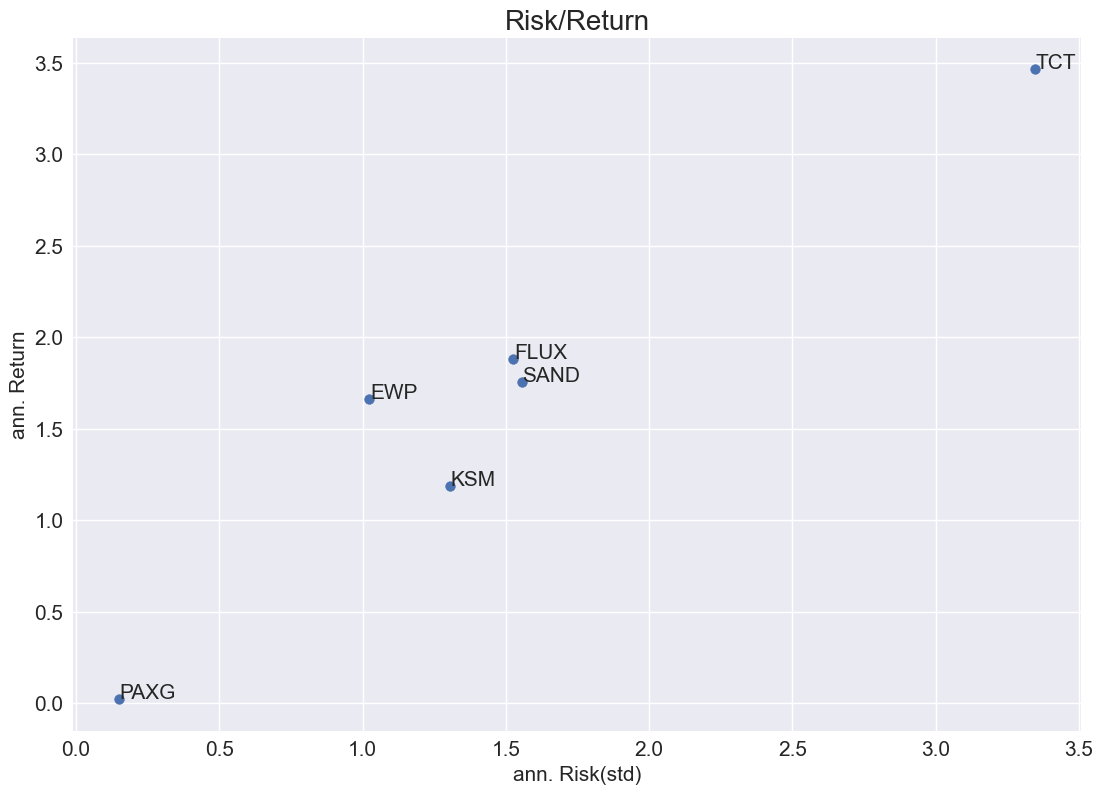

In [74]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [75]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*365
    summary.Risk = summary.Risk * np.sqrt(365)
    return summary

In [76]:
ret = stocks.pct_change().dropna()
ret.head()

,PAXG,KSM,FLUX,TCT,SAND
Date,,,,,
2020-08-15,-0.0072,0.0052,-0.0263,0.0329,-0.2236
2020-08-16,0.0067,-0.0304,-0.0586,0.0073,0.1939
2020-08-17,0.0181,-0.0164,0.0334,0.0256,-0.1125
2020-08-18,0.0172,0.0190,0.1114,-0.0097,-0.0426
2020-08-19,-0.0402,-0.0588,0.0223,-0.0592,0.0076


In [77]:
summary = ann_risk_return(ret)

In [78]:
summary

,Return,Risk
PAXG,0.0215,0.1507
KSM,1.1879,1.3065
FLUX,1.8832,1.5262
TCT,3.4647,3.3462
SAND,1.7563,1.5560


In [79]:
noa = len(stocks.columns)
noa

5

In [80]:
nop = 100000
nop

100000

In [81]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [82]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897],
       [0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752],
       [0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426],
       ...,
       [0.29637781, 0.99576832, 0.43176126, 0.87734014, 0.75144246],
       [0.47854994, 0.19749959, 0.07957797, 0.48064235, 0.53895995],
       [0.81115823, 0.10097173, 0.60449575, 0.96278719, 0.58875411]])

In [83]:
matrix.sum(axis = 1, keepdims= True)

array([[2.48024371],
       [2.96174982],
       [1.96852212],
       ...,
       [3.35269   ],
       [1.77522981],
       [3.068167  ]])

In [84]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [85]:
port_ret = ret.dot(weights.T)

In [86]:
port_ret

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-15,-0.0614,-0.0297,-0.0494,-0.0512,-0.0454,-0.0750,-0.0473,-0.0340,-0.0823,-0.0509,...,-0.0560,-0.0006,-0.0265,-0.0324,-0.0002,-0.0351,-0.0312,-0.0440,-0.0615,-0.0395
2020-08-16,0.0509,0.0042,0.0163,0.0445,0.0227,0.0557,0.0258,0.0133,0.0655,0.0182,...,0.0169,-0.0098,-0.0076,0.0309,-0.0133,0.0099,0.0077,0.0294,0.0567,0.0287
2020-08-17,-0.0207,-0.0059,-0.0174,-0.0139,-0.0124,-0.0304,-0.0140,-0.0012,-0.0286,-0.0092,...,-0.0090,0.0139,0.0104,-0.0024,0.0216,-0.0065,0.0003,-0.0175,-0.0227,-0.0027
2020-08-18,0.0027,0.0273,0.0260,0.0037,0.0201,0.0044,0.0186,0.0268,0.0032,0.0323,...,0.0376,0.0266,0.0465,0.0086,0.0354,0.0274,0.0297,0.0094,-0.0038,0.0159
2020-08-19,-0.0270,-0.0287,-0.0241,-0.0296,-0.0254,-0.0227,-0.0243,-0.0227,-0.0183,-0.0149,...,-0.0115,-0.0368,-0.0158,-0.0300,-0.0291,-0.0243,-0.0239,-0.0319,-0.0301,-0.0253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,-0.0237,-0.0240,-0.0210,-0.0216,-0.0233,-0.0264,-0.0295,-0.0252,-0.0218,-0.0219,...,-0.0127,-0.0197,-0.0104,-0.0336,-0.0176,-0.0289,-0.0187,-0.0318,-0.0267,-0.0215
2023-12-28,-0.0223,-0.0395,-0.0463,-0.0176,-0.0338,-0.0326,-0.0339,-0.0260,-0.0222,-0.0337,...,-0.0347,-0.0221,-0.0268,-0.0129,-0.0148,-0.0363,-0.0281,-0.0352,-0.0202,-0.0151
2023-12-29,-0.0299,-0.0227,-0.0098,-0.0321,-0.0235,-0.0239,-0.0324,-0.0343,-0.0237,-0.0206,...,-0.0051,-0.0342,-0.0125,-0.0571,-0.0369,-0.0317,-0.0232,-0.0353,-0.0360,-0.0358


In [87]:
port_summary = ann_risk_return(port_ret)
port_summary

,Return,Risk
0,1.5949,1.0303
1,1.6270,1.0159
2,1.3234,0.8909
3,1.5462,1.0347
4,1.6299,0.9956
...,...,...
99995,2.0693,1.2940
99996,1.6232,0.9956
99997,1.8975,1.2314
99998,1.6936,1.1529


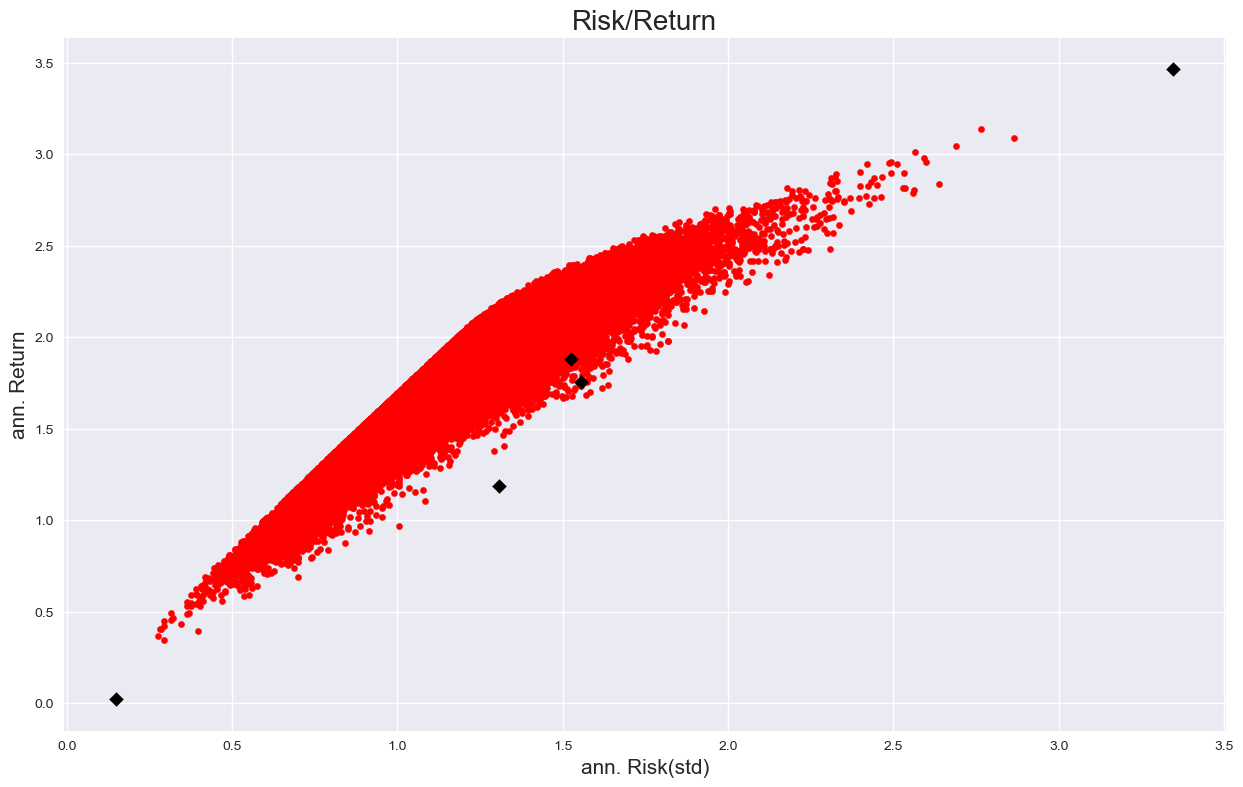

In [88]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [89]:
risk_free_return = 0.017
risk_free_risk = 0

In [90]:
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

In [91]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [92]:
summary

,Return,Risk,Sharpe
PAXG,0.0215,0.1507,0.0297
KSM,1.1879,1.3065,0.8962
FLUX,1.8832,1.5262,1.2228
TCT,3.4647,3.3462,1.0303
SAND,1.7563,1.5560,1.1178


In [93]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [103]:
port_summary.Sharpe.max()

1.6814337592283979

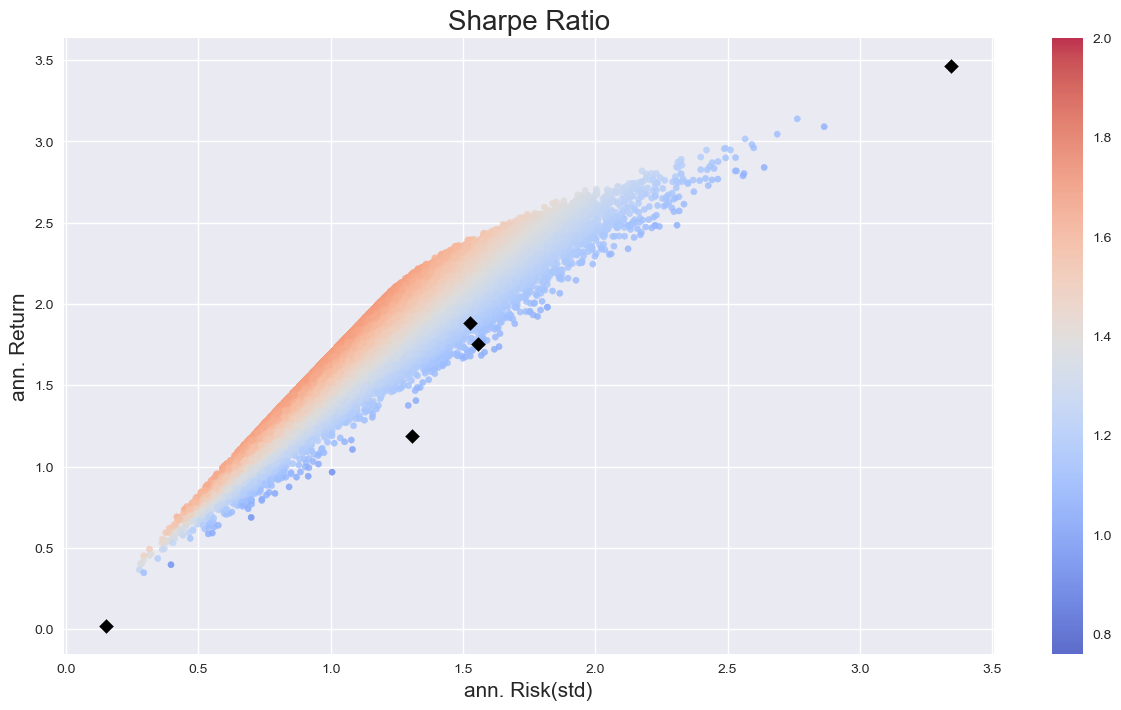

In [104]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 2, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

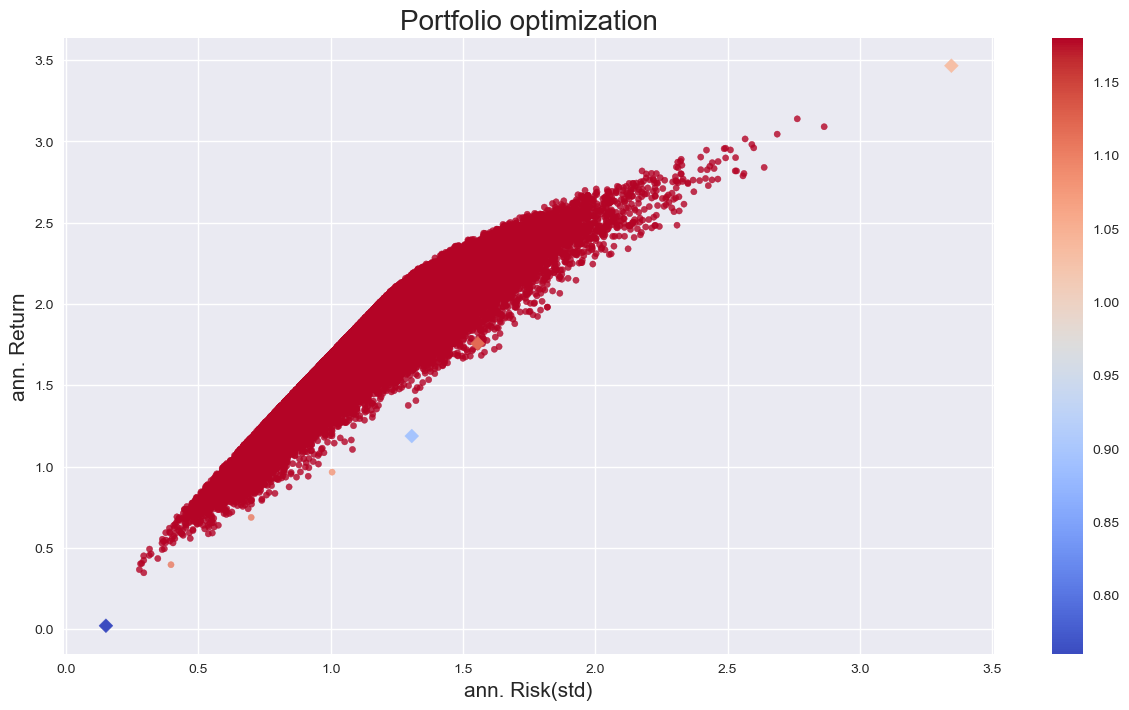

In [96]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.0, alpha = 0.8)
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D",
            c = summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18,)
plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Portfolio optimization", fontsize = 20)
plt.show()

In [105]:
msrp = port_summary.Sharpe.idxmax()
msrp

3298

In [98]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   2.0084
Risk     1.1843
Sharpe   1.6814
Name: 3298, dtype: float64

In [99]:
msrp_w = weights[msrp, :]
msrp_w

array([0.02403231, 0.09515661, 0.40803754, 0.17332147, 0.29945207])

In [100]:
pd.Series(index = stocks.columns, data = msrp_w)

PAXG   0.0240
KSM    0.0952
FLUX   0.4080
TCT    0.1733
SAND   0.2995
dtype: float64

In [101]:
opt_weights = pd.Series(index = stocks.columns, data = 
                        np.array([2.59608281e-01, 3.48750774e-01, 2.42861287e-17, 5.20417043e-18, 8.89045781e-17, 3.91640945e-01]))

ValueError: Length of values (6) does not match length of index (5)

In [102]:
ret["MP"] = ret.dot(opt_weights)

ValueError: matrices are not aligned

In [ ]:
summary = ann_risk_return(ret)

In [ ]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [ ]:
summary

,Return,Risk,Sharpe
BTC,0.5508,0.7195,0.7418
ETH,0.7352,0.9049,0.7936
LTC,0.5222,1.0083,0.5011
XRP,0.8593,1.2269,0.6866
ADA,1.2420,1.3326,0.9193
XMR,0.5186,0.9597,0.5227
MP,0.6025,0.7941,0.7373


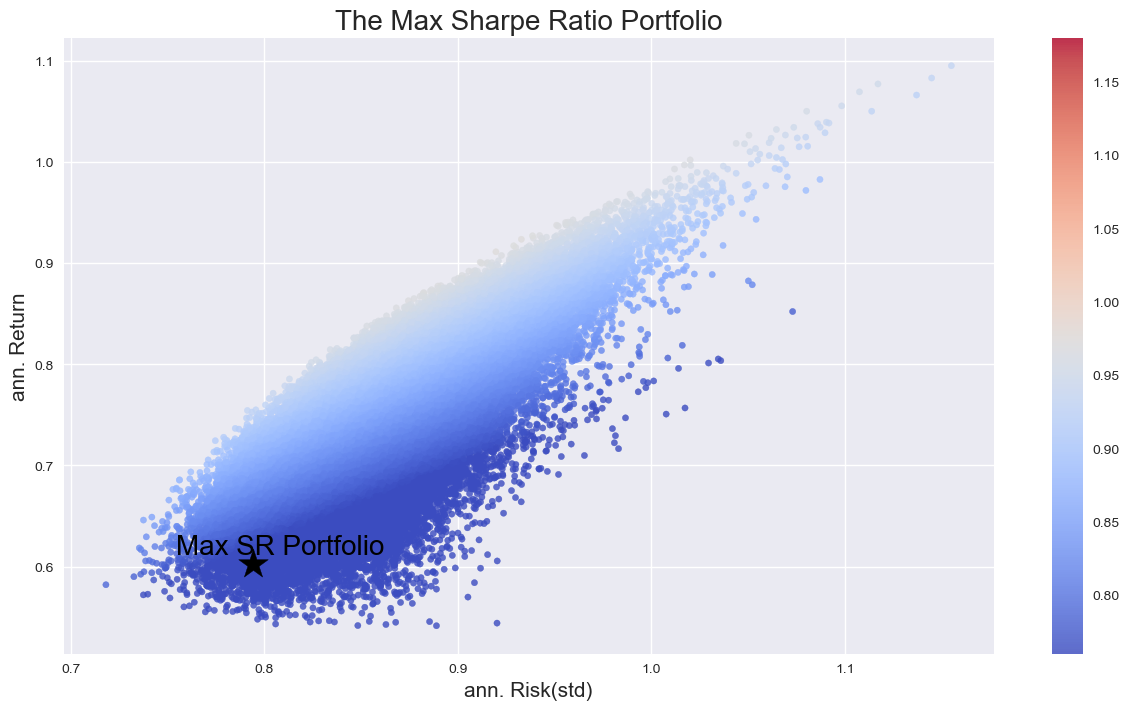

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 500, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.04, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.show()

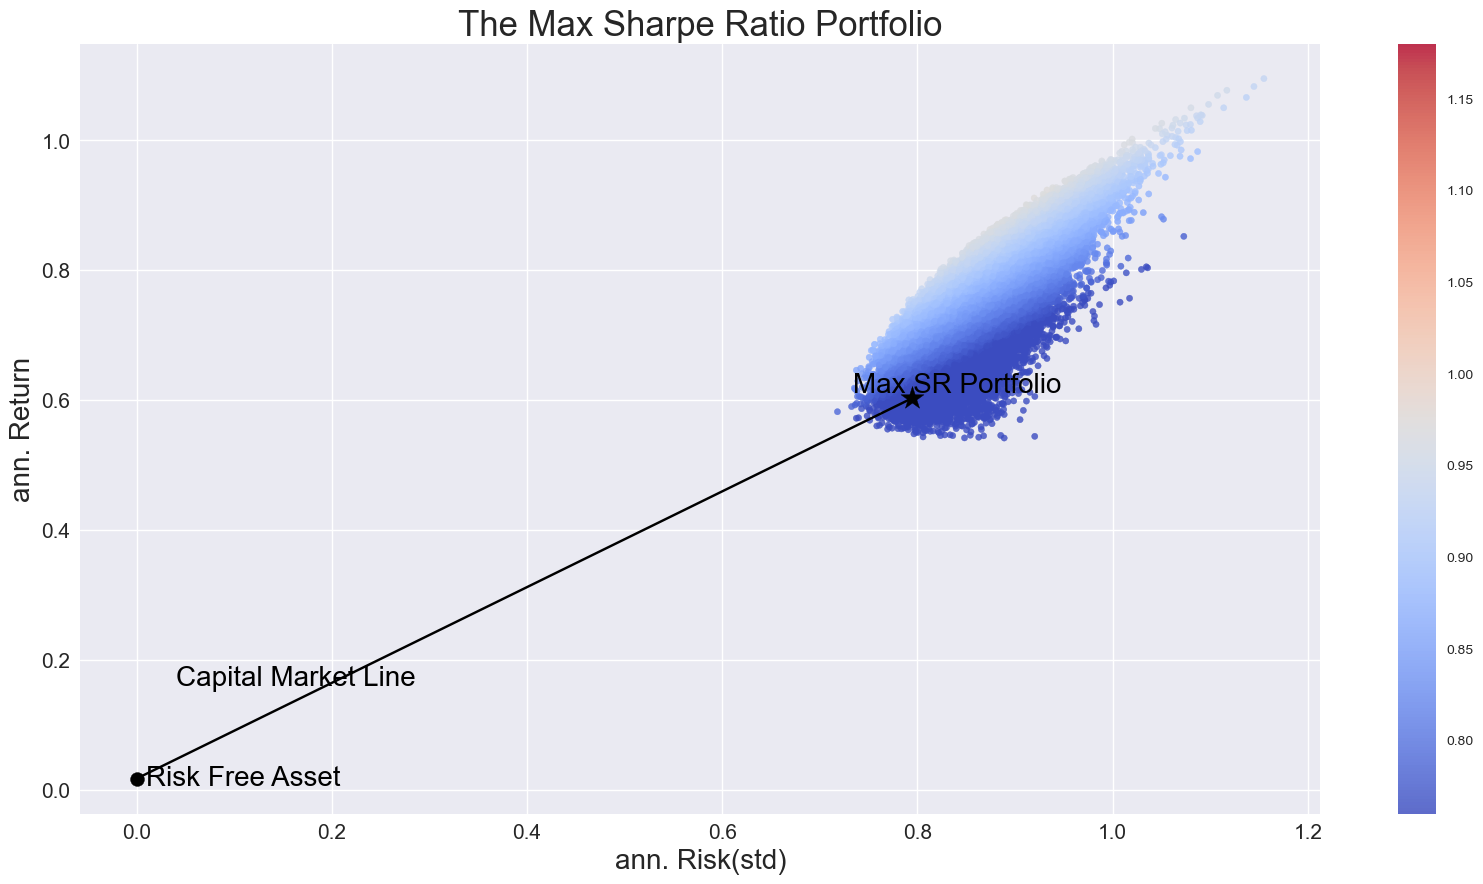

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.06, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 20)
plt.ylabel("ann. Return", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 25)
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.show()

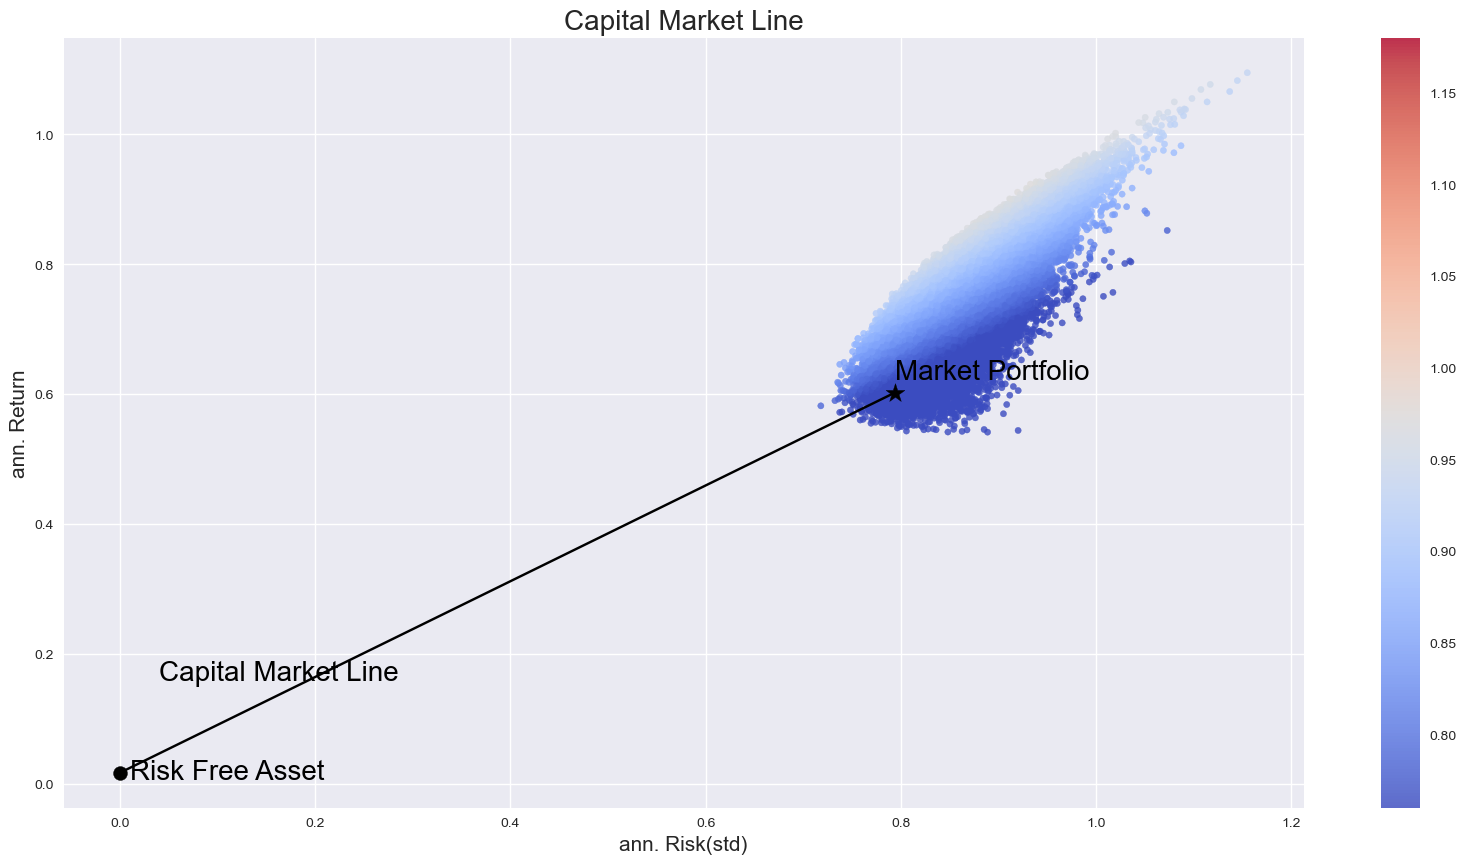

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.iloc[:, 2], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 200, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.iloc[6, 1], summary.iloc[6, 0]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Capital Market Line", fontsize = 20)
plt.show()